# SI 618 - Homework #3: Visualization and Univariate Statistics

### The total score for this assignment will be 100 points, consisting of:
- 10 pt: Overall quality of spelling, grammar, punctuation, etc. of written sentences. ([Guide](https://drive.google.com/file/d/1L0P7xJwjUGBvyb49mL3dw1Bt7hzRTiTl/view ))
- 10 pt: Codes are written in [PEP 8](https://www.python.org/dev/peps/pep-0008/) style.
- 80 pt: Homework questions. 
- 5   pt: An optional bonus question that is worth up to 5 points.

## Overview

This homework consists of an exploration of a well-known UCI data set about wine quality.  The dataset comes from https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009 and you should study the description of the data set before continuing. 


## Wine Quality

We get you started by loading some libraries as well as the wine quality dataset:

In [617]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

id='vdall'

In [618]:
wine = pd.read_csv('data/winequality-red.csv')
wine.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
538,12.9,0.350,0.49,5.8,0.066,5.0,35.0,1.00140,3.20,0.66,12.0,7
1573,6.0,0.580,0.20,2.4,0.075,15.0,50.0,0.99467,3.58,0.67,12.5,6
685,8.1,0.780,0.23,2.6,0.059,5.0,15.0,0.99700,3.37,0.56,11.3,5
679,10.8,0.260,0.45,3.3,0.060,20.0,49.0,0.99720,3.13,0.54,9.6,5
915,8.6,0.315,0.40,2.2,0.079,3.0,6.0,0.99512,3.27,0.67,11.9,6
1152,8.3,0.600,0.25,2.2,0.118,9.0,38.0,0.99616,3.15,0.53,9.8,5
704,9.1,0.765,0.04,1.6,0.078,4.0,14.0,0.99800,3.29,0.54,9.7,4
961,7.1,0.560,0.14,1.6,0.078,7.0,18.0,0.99592,3.27,0.62,9.3,5
739,9.0,0.690,0.00,2.4,0.088,19.0,38.0,0.99900,3.35,0.60,9.3,5
926,9.4,0.240,0.33,2.3,0.061,52.0,73.0,0.99786,3.47,0.90,10.2,6


## Answer the questions below.
- Write your Python code that can answer the following questions, 
- and explain **ALL** your answers in plain English. 

### <span style="color:magenta"> Q1. [5 points] What is the mode of 'quality'? DONE </span>


In [619]:
wine.mode()['quality'][0]

5

The most common value seen in the 'quality' column is 5.

### <span style="color:magenta"> Q2. [15 points] Create a markdown table that contains the mean, median, and standard deviation of each continuous variable (i.e. all numerical variables except for "quality").DONE  </span>


In [620]:
from scipy import stats

wineMean = wine.mean() 
wineMedian = wine.median() 
wineSd= wine.std()
print(wineMean)
print(wineMedian)
print(wineSd)

fixed acidity            8.319637
volatile acidity         0.527821
citric acid              0.270976
residual sugar           2.538806
chlorides                0.087467
free sulfur dioxide     15.874922
total sulfur dioxide    46.467792
density                  0.996747
pH                       3.311113
sulphates                0.658149
alcohol                 10.422983
quality                  5.636023
dtype: float64
fixed acidity            7.90000
volatile acidity         0.52000
citric acid              0.26000
residual sugar           2.20000
chlorides                0.07900
free sulfur dioxide     14.00000
total sulfur dioxide    38.00000
density                  0.99675
pH                       3.31000
sulphates                0.62000
alcohol                 10.20000
quality                  6.00000
dtype: float64
fixed acidity            1.741096
volatile acidity         0.179060
citric acid              0.194801
residual sugar           1.409928
chlorides                0.047

<b>Table containing original mean, median, and standard deviation for each continuous wine variable EXCEPT quality:<b>


| Variable               | Mean          | Median   | Standard Deviation |
| ---------------------- |:-------------| :-----------|: -------------------|
| fixed acidity          |  8.319637     |  7.90000 |  1.741096          |
| volatile acidity       |  0.527821     |  0.52000 |  0.179060          |
| citric acid            |  0.270976     |  0.26000 |  0.194801          |
| residual sugar         |  2.538806     |  2.20000 |  1.409928          |
| chlorides              |  0.087467     |  0.07900 |  0.047065          |
| free sulfur dioxide    | 15.874922     | 14.00000 | 10.460157          |
| total sulphur dioxide  | 46.467792     | 38.00000 | 32.895324          |
| density                |  0.996747     |  0.99675 |  0.001887          |
| pH                     |  3.311113     |  3.31000 |  0.154386          |
| sulphates              |  0.658149     |  0.62000 |  0.169507          |
| alcohol                | 10.422983     | 10.20000 |  1.065668          |


### <span style="color:magenta"> Q3. [10 points] Create a histogram that shows the distribution of "fixed acidity". Include a smoothing curve based on a kernel density estimate. DONE</span>


In [621]:
%matplotlib inline
import seaborn as sns

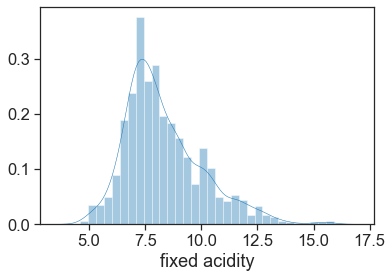

In [622]:
acid=sns.distplot(wine['fixed acidity'], kde=True)

To create a histogram demonstrating the distribution of fixed acidity, kde(kerner density estimate) was set to true. This allows the trend to be shown in a slightly more attractive way.  

### <span style="color:magenta"> Q4. [15 points] Calculate the standard deviation and 95% confidence interval (i.e. the range between the 2.5th and 97.5th percentiles) of "fixed acidity".  Use these values to determine to what extent the distribution of "fixed acidity" conforms to the empirical rule (i.e. that 95% of the values fall within 2 standard deviations of the mean).DONE </span>

In [623]:
print(np.std(wine['fixed acidity'])) #standard deviation
print(np.mean(wine['fixed acidity'])) #mean
print(np.percentile(wine['fixed acidity'],2.5),"-",np.percentile(wine['fixed acidity'],97.5))

#μ ± 2σ empirical rule in this case, since working with a 95% CI, is the mean plus/minus 2 multiplied by the SD. 
print(8.31+(2*1.74))
print(8.31-(2*1.74))

1.7405518001102782
8.319637273295838
5.6 - 12.5
11.790000000000001
4.83


The standard deviation is roughly 1.74 and the mean is roughly 8.31. When I used the formula provided by numpy, it showed a range of 5.6-12.5. The data would suggest that 95% of the fixed acidity values fall within plus/minus 1.74 measures from 8.31, which is within the range provided by the numpy formula.
The empirical rule provides a range slighty different than the numpy formula, roughly by .7 less for both measures, but this could be partially impacted by fixed acidity having results that skewed the mean. By looking at the histogram, it does have a slight right skew, and those lower values probably had an impact on the mean, which is the measure of central tendency most sensitive to extreme values.  

### <span style="color:magenta"> Q5a. [3 points] Create a new column called 'is_good' whose rows should contain the value 'yes' if the value of 'quality' is 6 or more, otherwise it should contain the value 'no'.DONE </span>


In [624]:
wine['is_good']=np.where(wine['quality']>=6,'yes','no')
wine.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_good
1392,7.1,0.620,0.06,1.3,0.070,5.0,12.0,0.99420,3.17,0.48,9.8,5,no
681,8.0,0.450,0.23,2.2,0.094,16.0,29.0,0.99620,3.21,0.49,10.2,6,yes
112,8.4,0.600,0.10,2.2,0.085,14.0,111.0,0.99640,3.15,0.66,9.8,5,no
1473,6.1,0.600,0.08,1.8,0.071,14.0,45.0,0.99336,3.38,0.54,11.0,5,no
166,6.8,0.640,0.10,2.1,0.085,18.0,101.0,0.99560,3.34,0.52,10.2,5,no
1434,10.2,0.540,0.37,15.4,0.214,55.0,95.0,1.00369,3.18,0.77,9.0,6,yes
280,11.4,0.260,0.44,3.6,0.071,6.0,19.0,0.99860,3.12,0.82,9.3,6,yes
1111,5.4,0.420,0.27,2.0,0.092,23.0,55.0,0.99471,3.78,0.64,12.3,7,yes
427,9.5,0.780,0.22,1.9,0.077,6.0,32.0,0.99880,3.26,0.56,10.6,6,yes
1376,8.2,0.885,0.20,1.4,0.086,7.0,31.0,0.99460,3.11,0.46,10.0,5,no


### <span style="color:magenta"> Q5b. [2 points] Create a new column called 'is_sweet' whose rows should contain the value 'yes' if the value of 'residual sugar' is greater than 3, otherwise it should contain the value 'no'.DONE </span>

In [625]:
wine['is_sweet']=np.where(wine['residual sugar']>3,'yes','no')
wine.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_good,is_sweet
795,10.8,0.890,0.30,2.6,0.132,7.0,60.0,0.99786,2.99,1.18,10.2,5,no,no
263,7.9,0.370,0.23,1.8,0.077,23.0,49.0,0.99630,3.28,0.67,9.3,5,no,no
777,6.9,0.635,0.17,2.4,0.241,6.0,18.0,0.99610,3.40,0.59,10.3,6,yes,no
805,8.2,0.280,0.40,2.4,0.052,4.0,10.0,0.99356,3.33,0.70,12.8,7,yes,no
906,7.2,0.540,0.27,2.6,0.084,12.0,78.0,0.99640,3.39,0.71,11.0,5,no,no
1495,7.0,0.430,0.02,1.9,0.080,15.0,28.0,0.99492,3.35,0.81,10.6,6,yes,no
1455,6.5,0.900,0.00,1.6,0.052,9.0,17.0,0.99467,3.50,0.63,10.9,6,yes,no
1429,7.9,0.180,0.40,2.2,0.049,38.0,67.0,0.99600,3.33,0.93,11.3,5,no,no
630,8.7,0.540,0.26,2.5,0.097,7.0,31.0,0.99760,3.27,0.60,9.3,6,yes,no
1185,7.0,0.430,0.30,2.0,0.085,6.0,39.0,0.99346,3.33,0.46,11.9,6,yes,no


### <span style="color:magenta"> Q6. [10 points] Create the following plot DONE: </span>

![](resources/violin.png)

Provide a meaningful interpretation of the plot.

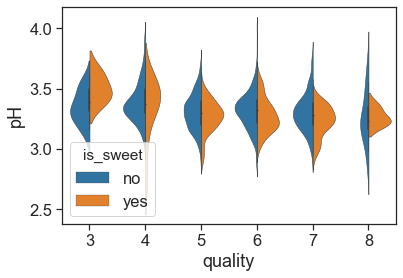

In [626]:
sns.violinplot(x=wine['quality'],y=wine['pH'],hue=wine['is_sweet'],split=True)
#stack overflow to find split=True

It appears the mean pH for each level of quality is about 3.3, and this is supported by the table created for Question 2. Wines with a quality of around 4 seem to have the largest range overall when it comes to pH, with outliers going as far between 2.5 - 4.0. The sweet quality 4 wines make up the lower pH end, and less sweet wines are closer to the 4.00 pH mark. Wines that are around a 5 in quality have the least amount of disparity between sweet and unsweet, the violin is almost symmetrical. Wines that have a quality of 8 and are sweet are more clustered around the mean than those that are unsweet.

### <span style="color:magenta"> Q7. [10 points] Create a pairplot that includes the following variables.  Use color to differentiate "good" from "bad" wines, using the "is_good" column.  </span>
- 'fixed acidity', 
- 'volatile acidity',
- 'citric acid', 
- 'residual sugar',
- 'free sulfur dioxide', 
- 'pH', 
- 'alcohol'

Explain what trends do you notice in good wines? What about bad wines?


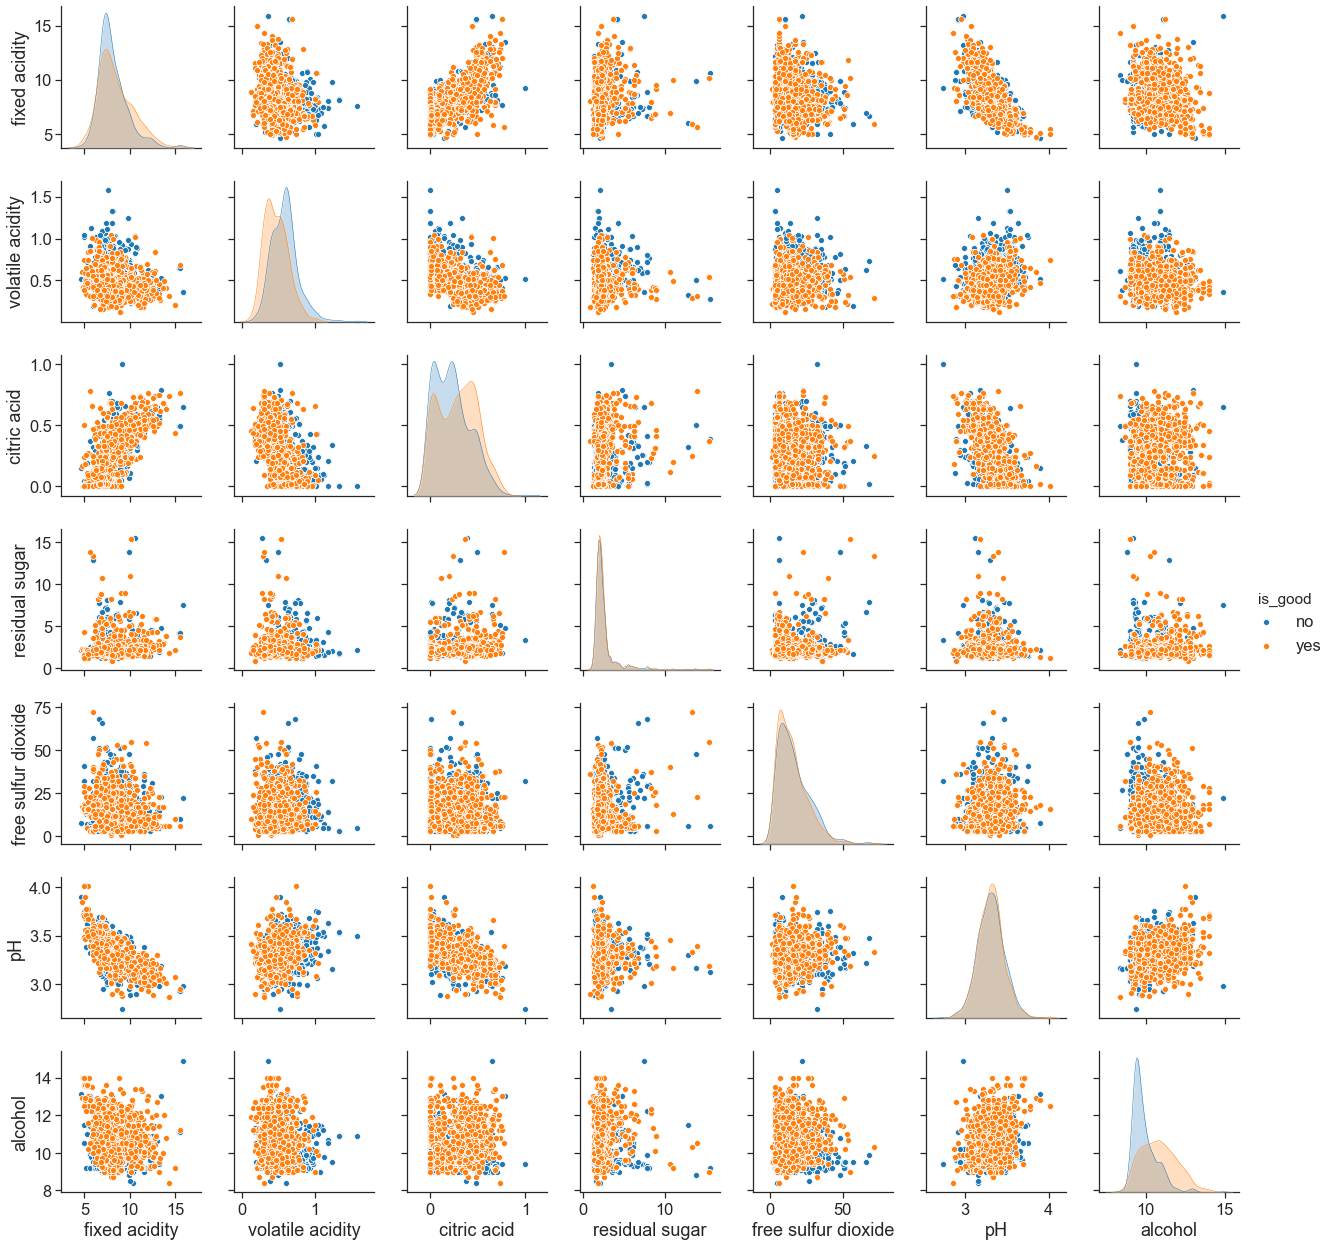

In [627]:
sns.pairplot(wine,hue='is_good',vars=['fixed acidity','volatile acidity','citric acid','residual sugar','free sulfur dioxide','pH','alcohol'])

For the most part, the good wines are more clustered within each variable than bad wines. The categories where good and bad wines show the most similiarities are pairing residual sugar to residual sugar and pH to pH. Pairings that really make the bad wines stand out are alcohol to alcohol; volatile acidity to almost any other variable except to volatile acidity; and citric acid. For those variables, one can see the trends that would lend to a wine being categorized as bad depending on the combinations (e.g. possibly a volatile acidity >0.5; an alcohol content >11; and citric acid >0.7).   

### <span style="color:magenta"> Q8. [10 points] Create a scatterplot of 'chlorides' (on the y-axis) vs. 'sulphates' (on the x-axis) and label one interesting point.  Use appropriate text and positioning for your annotation.DONE  </span>
Explain why you selected that point.


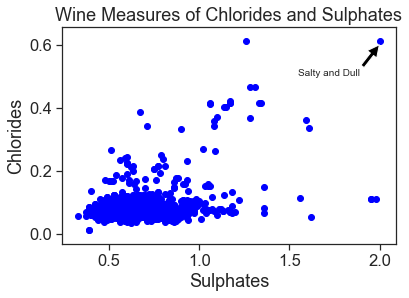

In [628]:
plt.scatter(wine["sulphates"],wine["chlorides"],c='b')
plt.title("Wine Measures of Chlorides and Sulphates")
plt.xlabel('Sulphates')
plt.ylabel('Chlorides')
plt.annotate("Salty and Dull", xy=(2,.6), xytext=(1.55,.5),
            arrowprops=dict(facecolor='black', shrink=0.01))
#plt.annotate()
plt.savefig('xkcd.png',format='png')
plt.show()

Wines that are high in sulphates are considered to be of low-quality and taste dull.</br> 
Chloride content can sometimes be attributed to whether a wine is a white (typically higher chloride) or a red(lower chloride), but wines that are high in chlorides are going to have a saltier taste.</br> 
Please don't drink the salty and dull vinho verde. </br>
To help support this, I found the referenced datapoint. Wine 151 has a quality rating of 4.

In [629]:
wine.sulphates.sort_values(ascending =False).head(5)

151    2.00
92     1.98
91     1.95
86     1.95
723    1.62
Name: sulphates, dtype: float64

In [630]:
print(wine.loc[[151]])

     fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
151            9.2              0.52          1.0             3.4       0.61   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
151                 32.0                  69.0   0.9996  2.74        2.0   

     alcohol  quality is_good is_sweet  
151      9.4        4      no      yes  


### <span style="color:magenta"> BONUS. [5 points] Plotting Anscombe's quartet  </span>



This optional task is to re-create the four plots that comprise Anscombe's quartet.  Full points will be awarded to plots that match the figure below **exactly** in terms of all details except for overall size of the image, which can be any reasonable size (i.e. it should be in scale with the notebook).

![](resources/anscombe_hw.png)

Note that the data is included as part of the Seaborn library, and we have included the code to load the data into a dataframe called anscombe_df:

In [631]:
import seaborn as sns
# Load the example dataset for Anscombe's quartet
anscombe_df = sns.load_dataset("anscombe")

In [632]:
anscombe_df.sample(5)

,dataset,x,y
8,I,12.0,10.84
27,III,14.0,8.84
28,III,6.0,6.08
3,I,9.0,8.81
0,I,10.0,8.04


In [633]:
an1=anscombe_df[anscombe_df['dataset']=='I']
an2=anscombe_df[anscombe_df['dataset']=='II']
an3=anscombe_df[anscombe_df['dataset']=='III']
an4=anscombe_df[anscombe_df['dataset']=='IV']

[[<matplotlib.axis.YTick at 0x1a98377b70>,
 Text(0, 0.5, 'y4'),
 Text(0.5, 0, 'x4')]

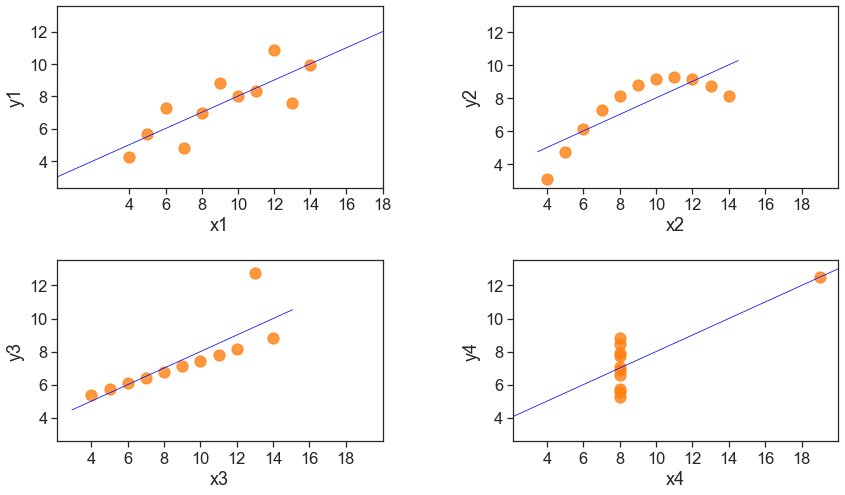

In [669]:
import seaborn as sns, numpy as np
from pylab import *

ax = plt.subplots(figsize=(14,8))

plt.subplots_adjust(hspace = 0.4, wspace=0.4)


sns.set_context('notebook',font_scale=1.5, rc={"lines.linewidth": .5})

subplot(2,2,1,sharex=ax2, sharey=ax2)
ax1=sns.regplot(an1['x'], an1['y'], ci=False, scatter_kws={"color": "C1", "s":125}, line_kws={"color": "blue"})
ax1.set(xlabel='x1', ylabel='y1',xticks=(4,6,8,10,12,14,16,18),yticks=(4,6,8,10,12))

subplot(2,2,2)
ax2=sns.regplot(an2['x'],an2['y'],color='C1', ci=False, scatter_kws={"color": "C1", "s":125}, line_kws={"color": "blue"})
ax2.set(xlabel='x2', ylabel='y2',xticks=(4,6,8,10,12,14,16,18),yticks=(4,6,8,10,12))

subplot(2,2,3,sharex=ax2, sharey=ax2)
ax3=sns.regplot(an3['x'],an3['y'],color='C1',ci=False, scatter_kws={"color": "C1", "s":125}, line_kws={"color": "blue"})
ax3.set(xlabel='x3', ylabel='y3',xticks=(4,6,8,10,12,14,16,18),yticks=(4,6,8,10,12))

subplot(2,2,4,sharex=ax2, sharey=ax2)
ax4=sns.regplot(an4['x'],an4['y'],color='C1',ci=False, scatter_kws={"color": "C1", "s":125}, line_kws={"color": "blue"})
ax4.set(xlabel='x4', ylabel='y4',xticks=(4,6,8,10,12,14,16,18),yticks=(4,6,8,10,12))

In [ ]:
#couldn't get those darn regression lines to extend for 2 and 3.